In [27]:
import os
import json
import jsonlines
import pandas as pd

In [28]:
directory_path = 'results/28_no_antialias'
output_filename = f"combined.jsonl"

COMBINE_FILES = True

In [29]:
if COMBINE_FILES:
    combined_data = []

    for filename in os.listdir(directory_path):
        if filename == output_filename:
            continue
        print(f"Processing {filename.ljust(100)}", end="")
        # Check if the file is a .jsonl file
        if filename.endswith(".jsonl"):
            file_path = os.path.join(directory_path, filename)
            # Read the .jsonl file using jsonlines
            with jsonlines.open(file_path, mode='r') as reader:
                combined_data.extend(reader)
        print("Done")

    output_path = os.path.join(directory_path, output_filename)
    with jsonlines.open(output_path, mode='w') as writer:
        writer.write_all(combined_data)

    print(f"Combined data written to {output_path}")
else:
    print(f"Reading data from {output_filename}")

Processing detailed_model_results_jupyter-jalarssen_28_resnet101.jsonl                                         Done
Processing detailed_model_results_jupyter-jalarssen_28_densenet121.jsonl                                       Done
Processing detailed_model_results_jupyter-jalarssen_28_densenet169.jsonl                                       Done
Processing detailed_model_results_jupyter-jalarssen_28_resnet50.jsonl                                          Done
Processing detailed_model_results_jupyter-jalarssen_28_densenet201.jsonl                                       Done
Processing detailed_model_results_jupyter-jalarssen_28_resnet152.jsonl                                         Done
Combined data written to results/28_no_antialias/combined.jsonl


In [30]:
detailed_results_path = os.path.join(directory_path, output_filename)

In [31]:
#detailed_results_path = 'results/detailed_model_results_jupyter-jalarssen_28_densenet121.jsonl'
#detailed_results_path = 'results/detailed_model_results_DESKTOP-UHDJ875_512_20241201.jsonl'

In [32]:
with jsonlines.open(detailed_results_path) as reader:
    data = list(reader)

In [33]:
# Normalize the nested 'Results' into separate records
records = []
for run in data:
    model = run["Model"]
    run_num = run["Run"]
    timestamp = run.get("Timestamp", "")
    for pathology_result in run["Results"]:
        record = {
            "Model": model,
            "Run": run_num,
            "Timestamp": timestamp,
            "Pathology": pathology_result["Pathology"],
            "Validation AUC": pathology_result["Validation AUC"],
            "Test AUC": pathology_result["Test AUC"],
            "Validation Predictions": pathology_result["Validation Predictions"],
            "Validation Actuals": pathology_result["Validation Actuals"],
            "Test Predictions": pathology_result["Test Predictions"],
            "Test Actuals": pathology_result["Test Actuals"],
        }
        records.append(record)

# Create DataFrame
df = pd.DataFrame(records)

# Display the first few rows
print("First 5 rows of the DataFrame:")
print(df.head())

First 5 rows of the DataFrame:
       Model  Run            Timestamp      Pathology  Validation AUC  \
0  resnet101    1  2024-12-04 20:03:14    Atelectasis        0.772571   
1  resnet101    1  2024-12-04 20:03:14   Cardiomegaly        0.879541   
2  resnet101    1  2024-12-04 20:03:14  Consolidation        0.779860   
3  resnet101    1  2024-12-04 20:03:14          Edema        0.897583   
4  resnet101    1  2024-12-04 20:03:14       Effusion        0.866513   

   Test AUC                             Validation Predictions  \
0  0.711923  [0.0342630073428154, 0.007341509219259024, 0.0...   
1  0.853857  [0.0030541468877345324, 0.00018262882076669484...   
2  0.711064  [0.009249957278370857, 0.006009193137288094, 0...   
3  0.816034  [0.0026670570950955153, 0.0005090291379019618,...   
4  0.771669  [0.017404524609446526, 0.001936484593898058, 0...   

                                  Validation Actuals  \
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1  [0.0, 0.0, 0.0, 0.

In [34]:
# Display basic information about the DataFrame
print("\nDataFrame Information:")
print(df.info())

# Summary statistics for numeric columns
print("\nSummary Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Display unique models and pathologies
print("\nUnique Models:", df["Model"].unique())
print("Unique Pathologies:", df["Pathology"].unique())

# Count of runs per model
print("\nRuns per Model:")
print(df.groupby("Model")["Run"].nunique())

# Count of runs per model and pathology
print("\nRuns per Model and Pathology:")
print(df.groupby(["Model", "Pathology"]).size().unstack(fill_value=0))
df


DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448 entries, 0 to 447
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Model                   448 non-null    object 
 1   Run                     448 non-null    int64  
 2   Timestamp               448 non-null    object 
 3   Pathology               448 non-null    object 
 4   Validation AUC          448 non-null    float64
 5   Test AUC                448 non-null    float64
 6   Validation Predictions  448 non-null    object 
 7   Validation Actuals      448 non-null    object 
 8   Test Predictions        448 non-null    object 
 9   Test Actuals            448 non-null    object 
dtypes: float64(2), int64(1), object(7)
memory usage: 35.1+ KB
None

Summary Statistics:
              Run  Validation AUC    Test AUC
count  448.000000      448.000000  448.000000
mean     2.906250        0.777870    0.732884
std     

,Model,Run,Timestamp,Pathology,Validation AUC,Test AUC,Validation Predictions,Validation Actuals,Test Predictions,Test Actuals
0,resnet101,1,2024-12-04 20:03:14,Atelectasis,0.772571,0.711923,"[0.0342630073428154, 0.007341509219259024, 0.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.14641013741493225, 0.018199989572167397, 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,resnet101,1,2024-12-04 20:03:14,Cardiomegaly,0.879541,0.853857,"[0.0030541468877345324, 0.00018262882076669484...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","[0.0007257132092490792, 0.0008330850396305323,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,resnet101,1,2024-12-04 20:03:14,Consolidation,0.779860,0.711064,"[0.009249957278370857, 0.006009193137288094, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.011172482743859291, 0.012142839841544628, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,resnet101,1,2024-12-04 20:03:14,Edema,0.897583,0.816034,"[0.0026670570950955153, 0.0005090291379019618,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0006074729608371854, 0.0006556785083375871,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,resnet101,1,2024-12-04 20:03:14,Effusion,0.866513,0.771669,"[0.017404524609446526, 0.001936484593898058, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...","[0.03302629292011261, 0.01783665642142296, 0.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...,...,...,...,...,...
443,resnet152,5,2024-12-04 21:10:32,Mass,0.758836,0.702653,"[0.01970687136054039, 0.03389477729797363, 0.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.006783660966902971, 0.017695538699626923, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
444,resnet152,5,2024-12-04 21:10:32,Nodule,0.648500,0.618099,"[0.09326554834842682, 0.04130256548523903, 0.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.07434464991092682, 0.10582689940929413, 0.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
445,resnet152,5,2024-12-04 21:10:32,Pleural_Thickening,0.757132,0.697684,"[0.01349879615008831, 0.009068850427865982, 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.020884912461042404, 0.027131887152791023, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
446,resnet152,5,2024-12-04 21:10:32,Pneumonia,0.691061,0.640592,"[0.003982353024184704, 0.0006465254700742662, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0018978338921442628, 0.006521714851260185, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


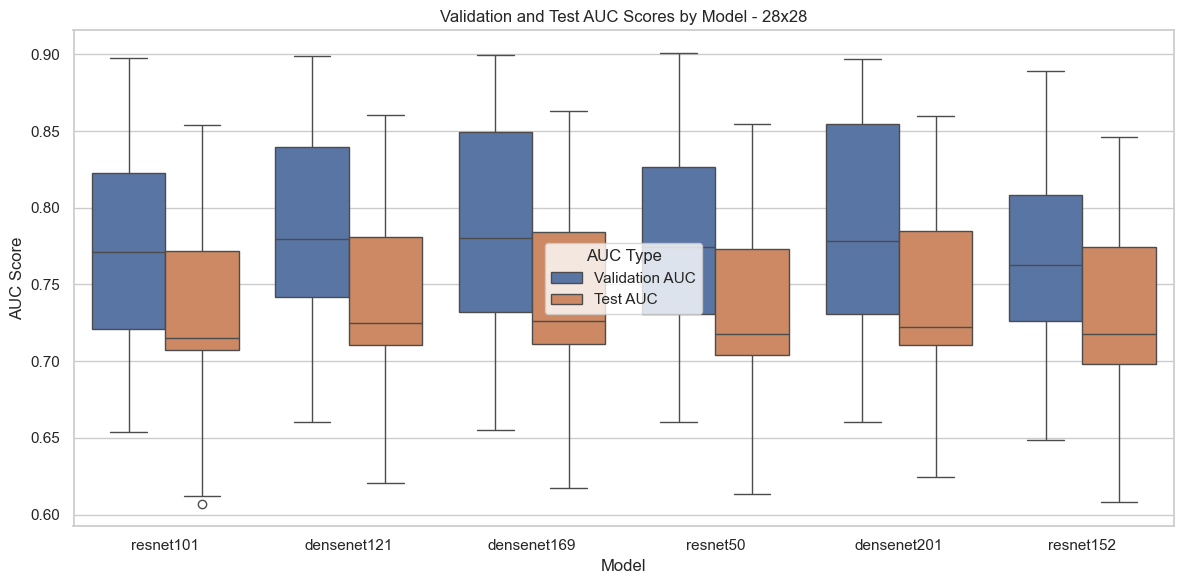

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Initialize the matplotlib figure
plt.figure(figsize=(12, 6))

# Melt the DataFrame to have AUC types as a variable
df_melted = df.melt(id_vars=["Model", "Pathology"], 
                    value_vars=["Validation AUC", "Test AUC"],
                    var_name="AUC Type", 
                    value_name="AUC Score")

# Create a boxplot
sns.boxplot(x="Model", y="AUC Score", hue="AUC Type", data=df_melted)

# Add title and labels
plt.title("Validation and Test AUC Scores by Model - 28x28")
plt.xlabel("Model")
plt.ylabel("AUC Score")
plt.legend(title="AUC Type")

# Show the plot
plt.tight_layout()
plt.savefig(f"{directory_path}/boxplot")
plt.show()


In [36]:
# Show mean +- std for each model
print("\nMean and Standard Deviation of AUC Scores by Model:")
print(df.groupby("Model")["Validation AUC"].agg(["mean", "std"]))
print(df.groupby("Model")["Test AUC"].agg(["mean", "std"]))


Mean and Standard Deviation of AUC Scores by Model:
                 mean       std
Model                          
densenet121  0.782489  0.071020
densenet169  0.782849  0.072343
densenet201  0.781366  0.072377
resnet101    0.773457  0.071247
resnet152    0.768791  0.068948
resnet50     0.776275  0.068552
                 mean       std
Model                          
densenet121  0.735587  0.064297
densenet169  0.738502  0.065105
densenet201  0.736549  0.064171
resnet101    0.728121  0.063008
resnet152    0.726658  0.064471
resnet50     0.729642  0.063213


In [37]:
# Group and Aggregate for each Pathology and Model
aggregated = (
    df.groupby(["Pathology", "Model"])
    .agg(mean=("Validation AUC", "mean"), std=("Validation AUC", "std"))
    .reset_index()
)

# Format the mean and std as a single column
aggregated["Result"] = (
    aggregated["mean"].round(4).astype(str) + " ± " + aggregated["std"].round(4).astype(str)
)

# Pivot the table
pivot_table = aggregated.pivot(index="Pathology", columns="Model", values="Result")

# Replace missing values with "—"
pivot_table = pivot_table.fillna("—")

# Compute the Mean ± Std for each Model
mean_std = (
    df.groupby("Model")["Validation AUC"]
    .agg(["mean", "std"])
    .round(4)
    .reset_index()  # Reset index to ensure "Model" is a column
    .assign(Result=lambda x: x["mean"].astype(str) + " ± " + x["std"].astype(str))
    .set_index("Model")["Result"]  # Set "Model" as index and keep "Result"
)

# Add the Mean ± Std as the last row
pivot_table.loc["Mean"] = mean_std



In [38]:
print("28x28")
pivot_table

28x28


Model,densenet121,densenet169,densenet201,resnet101,resnet152,resnet50
Pathology,,,,,,
Atelectasis,0.7789 ± 0.0031,0.7821 ± 0.0023,0.7793 ± 0.0032,0.7739 ± 0.0011,0.7685 ± 0.0049,0.777 ± 0.0024
Cardiomegaly,0.8847 ± 0.0016,0.8895 ± 0.0043,0.8893 ± 0.0046,0.8796 ± 0.0043,0.8781 ± 0.0047,0.8734 ± 0.0057
Consolidation,0.7791 ± 0.001,0.7767 ± 0.0029,0.7749 ± 0.0036,0.7745 ± 0.0039,0.7624 ± 0.0073,0.7766 ± 0.0053
Edema,0.8957 ± 0.0038,0.8962 ± 0.0044,0.8912 ± 0.0057,0.8887 ± 0.0071,0.8842 ± 0.0077,0.8953 ± 0.0034
Effusion,0.8733 ± 0.0019,0.8737 ± 0.0028,0.8733 ± 0.002,0.8644 ± 0.0017,0.8627 ± 0.0059,0.8673 ± 0.0015
Emphysema,0.7821 ± 0.0052,0.7809 ± 0.0142,0.7793 ± 0.0116,0.762 ± 0.0112,0.7666 ± 0.0102,0.7683 ± 0.0082
Fibrosis,0.7403 ± 0.0046,0.7311 ± 0.0059,0.7325 ± 0.007,0.7215 ± 0.0061,0.725 ± 0.0087,0.7268 ± 0.0093
Hernia,0.8423 ± 0.019,0.8505 ± 0.0164,0.8521 ± 0.0155,0.8328 ± 0.0228,0.8041 ± 0.0227,0.8244 ± 0.0221
Infiltration,0.6788 ± 0.0031,0.6816 ± 0.0024,0.6772 ± 0.0023,0.6761 ± 0.002,0.6729 ± 0.0041,0.6807 ± 0.002


In [39]:
def pivot_table_to_latex_with_bold(pivot_table, caption, label, row_label="Condition", max_columns=4):
    """
    Convert a pivot table DataFrame into multiple LaTeX tabular strings with the highest value in each row bolded.
    Escapes underscores in column headers and replaces underscores with spaces in row labels for LaTeX compatibility.
    Splits the table into chunks of at most `max_columns` models.

    Parameters:
        pivot_table (DataFrame): The DataFrame to convert.
        caption (str): The caption for the LaTeX table.
        label (str): The label for the LaTeX table for referencing.
        row_label (str): The label for the first column.
        max_columns (int): Maximum number of models (columns) per table.

    Returns:
        str: LaTeX tables as a formatted string.
    """
    latex_tables = []

    # Escape underscores in column headers for LaTeX
    escape_latex = lambda x: x.replace("_", "")
    pivot_table.columns = [escape_latex(col) for col in pivot_table.columns]

    # Replace underscores with spaces in row labels (index)
    pivot_table.index = [idx.replace("_", " ") for idx in pivot_table.index]

    # Split the table into chunks of `max_columns`
    for i in range(0, len(pivot_table.columns), max_columns):
        sub_table = pivot_table.iloc[:, i:i + max_columns]

        # Begin the table environment
        latex_table = []
        latex_table.append("\\begin{table}[ht]")
        latex_table.append("\\centering")
        latex_table.append("\\begin{tabular}{l" + "c" * len(sub_table.columns) + "}")
        latex_table.append("\\toprule")

        # Add column headers
        column_headers = " & ".join([f"\\textbf{{{col}}}" for col in [row_label] + list(sub_table.columns)])
        latex_table.append(column_headers + " \\\\ \\midrule")

        # Add rows
        for idx, row in sub_table.iterrows():
            formatted_row = [f"{idx}"]  # Row label
            values = []

            max_value = None
            try:
                max_value = max([float(val.split(" ± ")[0]) for val in row if val != "---"])
            except Exception:
                pass

            for col, value in row.items():
                if value == "---":
                    values.append("---")
                else:
                    # Replace ± with \pm for LaTeX compatibility
                    value = value.replace(" ± ", " \\pm ")
                    if float(value.split(" \\pm ")[0]) == max_value:
                        values.append(f"$\\mathbf{{{value}}}$")
                    else:
                        values.append(f"${value}$")

            formatted_row.append(" & ".join(values))
            latex_table.append(" & ".join(formatted_row) + " \\\\")

        # Add the bottom rule and table footer
        latex_table.append("\\bottomrule")
        latex_table.append("\\end{tabular}")
        latex_table.append(f"\\caption{{{caption} (Part {i // max_columns + 1})}}")
        latex_table.append(f"\\label{{{label}_part{i // max_columns + 1}}}")
        latex_table.append("\\end{table}")

        latex_tables.append("\n".join(latex_table))

    return "\n\n".join(latex_tables)


# Example usage with a pivot_table DataFrame
caption = "Mean $\\pm$ Std values for different models across conditions."
label = "tab:results"

latex_output = pivot_table_to_latex_with_bold(
    pivot_table=pivot_table,
    caption=caption,
    label=label,
    row_label="Condition",
    max_columns=12  # Set the maximum number of models per table
)

# Print the LaTeX tables for copy-paste
print(latex_output)

# Save the LaTeX output to a .tex file
output_file = f"{directory_path}/pivot_table_results.tex"

with open(output_file, "w") as f:
    f.write(latex_output)

print(f"LaTeX tables have been written to {output_file}")

\begin{table}[ht]
\centering
\begin{tabular}{lcccccc}
\toprule
\textbf{Condition} & \textbf{densenet121} & \textbf{densenet169} & \textbf{densenet201} & \textbf{resnet101} & \textbf{resnet152} & \textbf{resnet50} \\ \midrule
Atelectasis & $0.7789 \pm 0.0031$ & $\mathbf{0.7821 \pm 0.0023}$ & $0.7793 \pm 0.0032$ & $0.7739 \pm 0.0011$ & $0.7685 \pm 0.0049$ & $0.777 \pm 0.0024$ \\
Cardiomegaly & $0.8847 \pm 0.0016$ & $\mathbf{0.8895 \pm 0.0043}$ & $0.8893 \pm 0.0046$ & $0.8796 \pm 0.0043$ & $0.8781 \pm 0.0047$ & $0.8734 \pm 0.0057$ \\
Consolidation & $\mathbf{0.7791 \pm 0.001}$ & $0.7767 \pm 0.0029$ & $0.7749 \pm 0.0036$ & $0.7745 \pm 0.0039$ & $0.7624 \pm 0.0073$ & $0.7766 \pm 0.0053$ \\
Edema & $0.8957 \pm 0.0038$ & $\mathbf{0.8962 \pm 0.0044}$ & $0.8912 \pm 0.0057$ & $0.8887 \pm 0.0071$ & $0.8842 \pm 0.0077$ & $0.8953 \pm 0.0034$ \\
Effusion & $0.8733 \pm 0.0019$ & $\mathbf{0.8737 \pm 0.0028}$ & $0.8733 \pm 0.002$ & $0.8644 \pm 0.0017$ & $0.8627 \pm 0.0059$ & $0.8673 \pm 0.0015$ \\
Emph